# Movies Recommender System


In this notebook, I will attempt at implementing a few recommendation algorithms (content based, popularity based and collaborative filtering) and try to build an ensemble of these models to come up with our final recommendation system. With us, we have two MovieLens datasets.

* **The Movies Dataset:** A dataset of 4814 rows containing columns such as budget, genres etc.
* **The Credits Dataset:** A dataset of 4814 rows containing columns such as movie_id, title, cast, crew

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
credits_df = pd.read_csv('credits.csv',low_memory=False)
movies_df = pd.read_csv('movies.csv',low_memory=False)

In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies_df.isna().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [6]:
credits_df.shape, movies_df.shape

((4803, 4), (4803, 20))

In [7]:
movies_df.drop('homepage',axis=1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",13-10-2013,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6
4801,0,[],126186,[],en,Shanghai Calling,When ambitious New York atto

In [8]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
movies_df = movies_df.merge(credits_df,on='title')

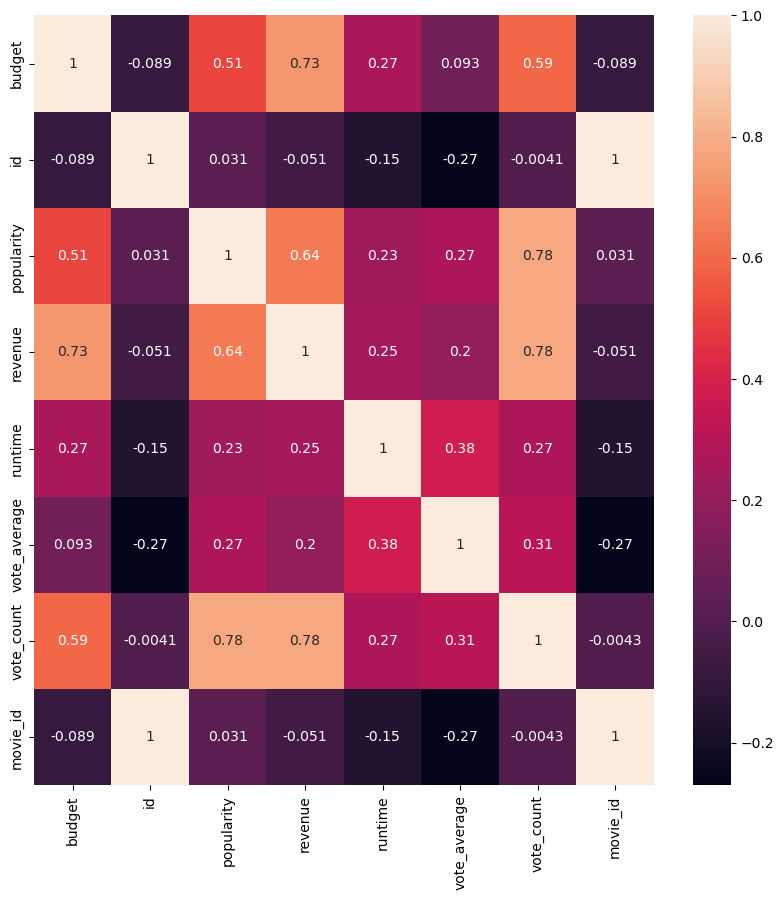

In [10]:
# Creating a correlation matrix
fig,ax = plt.subplots(figsize=(10,10))
corr = movies_df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,ax=ax);

In [11]:
movies_df = movies_df[['movie_id','title','overview','genres','keywords','cast','crew','vote_average','runtime','revenue']]

In [12]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,162.0,2787965087
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,169.0,961000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,148.0,880674609
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,165.0,1084939099
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,132.0,284139100


In [13]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4807
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie_id      4808 non-null   int64  
 1   title         4808 non-null   object 
 2   overview      4805 non-null   object 
 3   genres        4808 non-null   object 
 4   keywords      4808 non-null   object 
 5   cast          4808 non-null   object 
 6   crew          4808 non-null   object 
 7   vote_average  4808 non-null   float64
 8   runtime       4806 non-null   float64
 9   revenue       4808 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 413.2+ KB


In [14]:
# Check if there are any missing values present in the dataset
movies_df.isna().sum()

movie_id        0
title           0
overview        3
genres          0
keywords        0
cast            0
crew            0
vote_average    0
runtime         2
revenue         0
dtype: int64

In [15]:
movies_df.dropna(inplace=True)

In [16]:
movies_df.isna().sum()

movie_id        0
title           0
overview        0
genres          0
keywords        0
cast            0
crew            0
vote_average    0
runtime         0
revenue         0
dtype: int64

In [17]:
movies_df.duplicated().sum()
# This indicates that we have no duplicate values

0

In [18]:
movies_df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
import ast

In [20]:
# Convert the dictionary into a list so it is easier to evaluate ( for genres and keywords)
def convert(obj):
    L = []
    for i in ast.literal_eval(obj):
        L.append(i['name'])
    return L

In [21]:
movies_df['genres'] = movies_df['genres'].apply(convert)
movies_df['keywords'] = movies_df['keywords'].apply(convert)
movies_df

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,162.0,2787965087
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,169.0,961000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,148.0,880674609
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,165.0,1084939099
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,132.0,284139100
...,...,...,...,...,...,...,...,...,...,...
4803,9367,El Mariachi,El Mariachi just wants to play his guitar and ...,"[Action, Crime, Thriller]","[united states–mexico barrier, legs, arms, pap...","[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de...",6.6,81.0,2040920
4804,72766,Newlyweds,A newlywed couple's honeymoon is upended by th...,"[Comedy, Romance]",[],"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de...",5.9,85.0,0
4805,231617,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...","[Comedy, Drama, Romance, TV Movie]","[date, love at first sight, narration, investi...","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de...",7.0,120.0,0
4806,126186,Shanghai Calling,When ambitious New York attorney Sam is sent t...,[],[],"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de...",5.7,98.0,0


In [22]:
def convert3(obj):
    L = []
    counter=0
    for i in ast.literal_eval(obj):
        if counter!=3:
            L.append(i['name'])
            counter+=1
        else:
            break
            
        return L


In [23]:
movies_df['cast'] = movies_df['cast'].apply(convert)

In [24]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.2,162.0,2787965087
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.9,169.0,961000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.3,148.0,880674609
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.6,165.0,1084939099
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.1,132.0,284139100


In [25]:
def get_director(obj):
    L = []
    for i in ast.literal_eval(obj):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L

In [26]:
movies_df['crew'] = movies_df['crew'].apply(get_director)

In [27]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.2,162.0,2787965087
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.9,169.0,961000000
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.3,148.0,880674609
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.6,165.0,1084939099
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1,132.0,284139100


In [28]:
# Let's check the overview for the first movie
movies_df['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [29]:
# We have split the overview and created a list containing all the words
movies_df['overview'] = movies_df['overview'].apply(lambda x:x.split())

In [30]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],7.2,162.0,2787965087
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],6.9,169.0,961000000
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],6.3,148.0,880674609
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],7.6,165.0,1084939099
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],6.1,132.0,284139100


In [31]:
# Let's replace the spaces between words (if any)
movies_df['genres'] = movies_df['genres'].apply(lambda x:[i.replace(' ','') for i in x])
movies_df['keywords'] = movies_df['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
movies_df['cast'] = movies_df['cast'].apply(lambda x:[i.replace(' ','') for i in x])
movies_df['crew'] = movies_df['crew'].apply(lambda x:[i.replace(' ','') for i in x])

In [32]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,162.0,2787965087
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,169.0,961000000
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3,148.0,880674609
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6,165.0,1084939099
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1,132.0,284139100


In [33]:
# Let's create a new column and add overview, genres, keywords, cast and crew to it (merge them)
movies_df['tags'] = movies_df['overview']+movies_df['genres']+movies_df['keywords']+movies_df['cast']+movies_df['crew']

In [34]:
movies_df.head()

,movie_id,title,overview,genres,keywords,cast,crew,vote_average,runtime,revenue,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",[JamesCameron],7.2,162.0,2787965087,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",[GoreVerbinski],6.9,169.0,961000000,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux, Ralp...",[SamMendes],6.3,148.0,880674609,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman, Anne...",[ChristopherNolan],7.6,165.0,1084939099,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton, Wi...",[AndrewStanton],6.1,132.0,284139100,"[John, Carter, is, a, war-weary,, former, mili..."


In [35]:
movies_df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'MichelleRodriguez',
 'GiovanniRibisi',
 'JoelDavidMoore',
 'CCHPounder',
 'WesStudi',
 'LazAlonso',
 'DileepRao',
 'MattGerald',
 'SeanAnthonyMoran',
 'JasonWhyte',
 'ScottLawrence',
 'KellyKilgour',
 'JamesPatrickPitt',
 'SeanPatrickMurphy',
 'PeterDillon',
 'KevinDorman',
 'KelsonHenderson',
 'DavidVanHorn',
 'J

In [36]:
# Let's create a dataframe containing movie_id, title and all the other information( which was stored in tags)
movies = movies_df[['movie_id','title','tags','revenue','vote_average','runtime']]

In [37]:
movies.head()

,movie_id,title,tags,revenue,vote_average,runtime
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",2787965087,7.2,162.0
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",961000000,6.9,169.0
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",880674609,6.3,148.0
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",1084939099,7.6,165.0
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",284139100,6.1,132.0


In [38]:
movies['tags'] = movies['tags'].apply(lambda x: ' '.join(x))

C:\Users\Anant Roop Mathur\AppData\Local\Temp\ipykernel_42328\2303228016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(lambda x: ' '.join(x))


In [39]:
movies.head()

,movie_id,title,tags,revenue,vote_average,runtime
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...",2787965087,7.2,162.0
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",961000000,6.9,169.0
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,880674609,6.3,148.0
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,1084939099,7.6,165.0
4,49529,John Carter,"John Carter is a war-weary, former military ca...",284139100,6.1,132.0


* Now, we see that the tags column has a lot of information like overview, genres, keywords, cast and crew. So, we can infer from this data and later cluster the data by matching similar keywords, cast, crew or anything and later recommend a movie in the same cluster closest to the data point provided to us

In [40]:
# What we are trying to do is convert everything into lowercase for tags
movies['tags'] = movies['tags'].apply(lambda x:x.lower())

C:\Users\Anant Roop Mathur\AppData\Local\Temp\ipykernel_42328\1779477943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(lambda x:x.lower())


In [41]:
movies.head()

,movie_id,title,tags,revenue,vote_average,runtime
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di...",2787965087,7.2,162.0
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha...",961000000,6.9,169.0
2,206647,Spectre,a cryptic message from bond’s past sends him o...,880674609,6.3,148.0
3,49026,The Dark Knight Rises,following the death of district attorney harve...,1084939099,7.6,165.0
4,49529,John Carter,"john carter is a war-weary, former military ca...",284139100,6.1,132.0


In [42]:
# let's use Count Vectorizer for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=5000,stop_words='english')

In [43]:
vectorized = vectorizer.fit_transform(movies['tags']).toarray()

In [44]:
vectorized.shape

(4805, 5000)

In [45]:
vectorized[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
len(vectorizer.get_feature_names_out()) 

5000

In [47]:
import nltk

In [48]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [49]:
def stem(text):
    L = []
    for i in text.split():
        L.append(ps.stem(i))
    return " ".join(L)

In [50]:
movies['tags'] = movies['tags'].apply(stem)

C:\Users\Anant Roop Mathur\AppData\Local\Temp\ipykernel_42328\3456099318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(stem)


In [51]:
movies.head()

,movie_id,title,tags,revenue,vote_average,runtime
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",2787965087,7.2,162.0
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",961000000,6.9,169.0
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,880674609,6.3,148.0
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,1084939099,7.6,165.0
4,49529,John Carter,"john carter is a war-weary, former militari ca...",284139100,6.1,132.0


In [52]:
movies['tags'][0]

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi sciencefict cultureclash futur spacewar spacecoloni societi spacetravel futurist romanc space alien tribe alienplanet cgi marin soldier battl loveaffair antiwar powerrel mindandsoul 3d samworthington zoesaldana sigourneyweav stephenlang michellerodriguez giovanniribisi joeldavidmoor cchpounder wesstudi lazalonso dileeprao mattgerald seananthonymoran jasonwhyt scottlawr kellykilgour jamespatrickpitt seanpatrickmurphi peterdillon kevindorman kelsonhenderson davidvanhorn jacobtomuri michaelblain-rozgay joncurri lukehawk woodyschultz petermensah soniaye jahnelcurfman ilramchoi kylawarren lisaroumain debrawilson chrismala taylorkibbi jodielandau julielamm cullenb.madden josephbradymadden frankietorr austinwilson sarawilson tamicawashington-mil lucybri nathanmeist gerryblair matthewchamberlain paulyat wraywil

In [53]:
from sklearn.metrics.pairwise import cosine_similarity

In [54]:
similarity = cosine_similarity(vectorized)

In [55]:
similarity.shape

(4805, 4805)

In [56]:
similarity[0]

array([1.        , 0.07142857, 0.05143445, ..., 0.02353104, 0.02571722,
       0.        ])

In [57]:
def recommend(movie):
    movie_index = movies[movies['title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(range(len(distances)), key=lambda x: distances[x], reverse=True)[1:6]

    print(f"Movies similar to '{movie}':")
    for i in movies_list:
        
        title = movies.iloc[i].title
        revenue = movies.iloc[i].revenue
        runtime = movies.iloc[i].runtime
        vote_average = movies.iloc[i].vote_average
        print(f'''Title: {title} 
              Revenue: {revenue} dollars
              Runtime: {runtime} minutes
              Vote Average: {vote_average}''')

# Example usage:
recommend("The Avengers")


Movies similar to 'The Avengers':
Title: Avengers: Age of Ultron 
              Revenue: 1405403694 dollars
              Runtime: 141.0 minutes
              Vote Average: 7.3
Title: Iron Man 3 
              Revenue: 1215439994 dollars
              Runtime: 130.0 minutes
              Vote Average: 6.8
Title: Iron Man 
              Revenue: 585174222 dollars
              Runtime: 126.0 minutes
              Vote Average: 7.4
Title: Iron Man 2 
              Revenue: 623933331 dollars
              Runtime: 124.0 minutes
              Vote Average: 6.6
Title: Captain America: Civil War 
              Revenue: 1153304495 dollars
              Runtime: 147.0 minutes
              Vote Average: 7.1
